In [1]:
from PIL import Image
from glob import glob
import torchvision.transforms as transforms
import torch
import numpy as np

image_path = glob("./PeopleImages/*")


# Deep Lab V3

In [2]:
images = [Image.open(i).convert('RGB') for i in image_path]
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
transform_dlv3 = transforms.Compose([
        transforms.Resize((513, 513)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
input_tensor_dlv3=torch.stack(([transform_dlv3(i) for i in images]),dim=0)

print(np.asarray(images[0]).shape,input_tensor_dlv3.shape)

(436, 349, 3) torch.Size([10, 3, 513, 513])


In [14]:
import torch
import torchvision

# Load the pre-trained model from PyTorch Hub
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
with torch.no_grad():
    output = model(input_tensor_dlv3)['out']
    
# print(output.shape) 
mask = output.argmax(1).byte().cpu().numpy()
# print(mask.shape)
final_mask=np.zeros(input_tensor_dlv3.shape)
for i in range(mask.shape[0]):
    original_tensor = input_tensor_dlv3[i].cpu().numpy()
    original_tensor = original_tensor*std.reshape([3,1,1])+mean.reshape([3,1,1])
    final_mask[i]=np.where(mask[i]==15,original_tensor,0)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


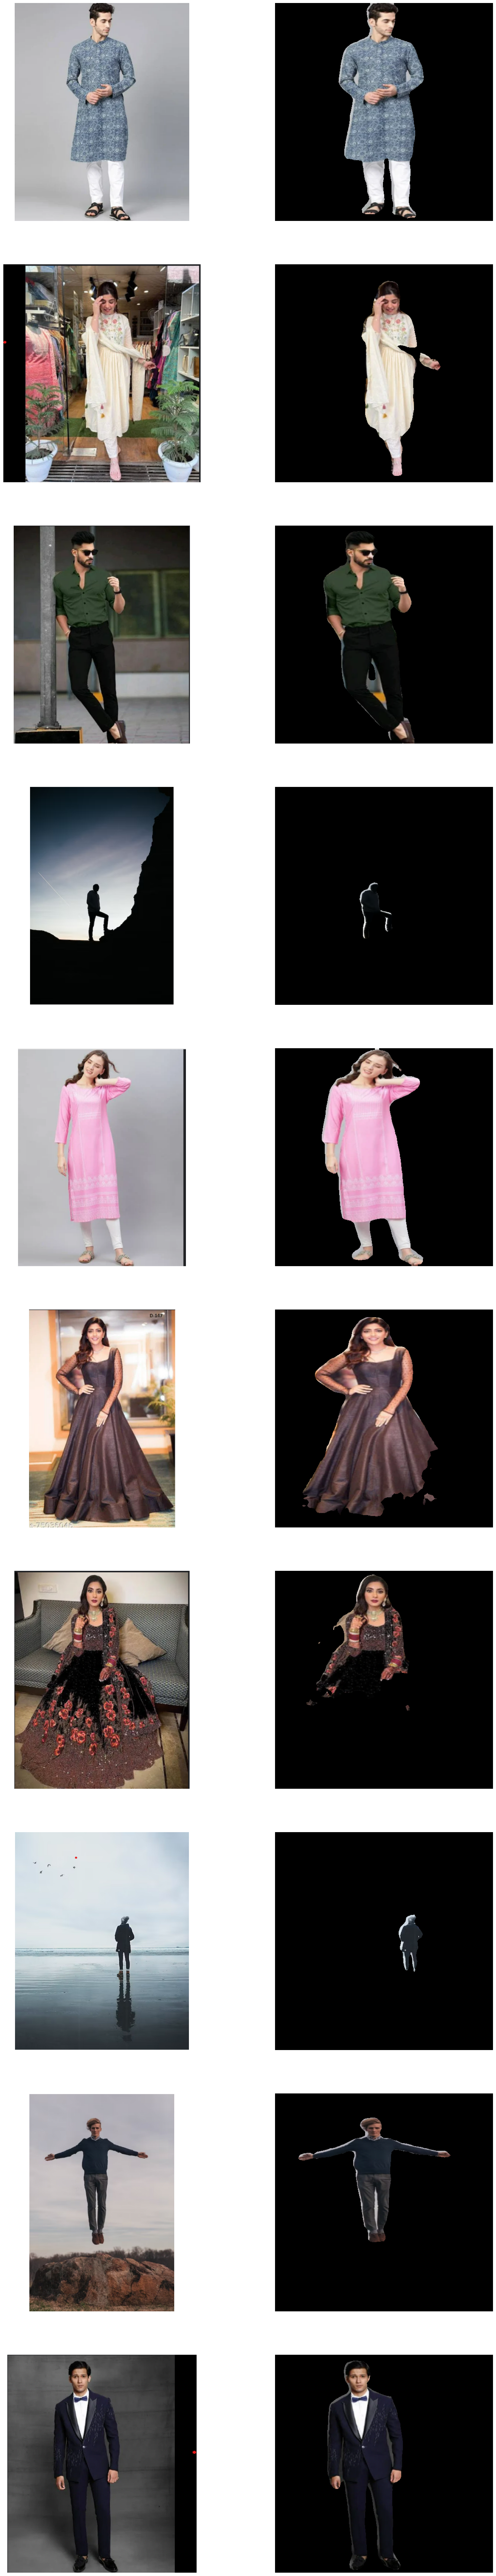

In [16]:
import matplotlib.pyplot as plt

fig,axes=plt.subplots(len(images), 2, figsize=(20, 100))
for i  in range(len(images)):
    axes[i,0].imshow(images[i])
    axes[i,0].axis('off')
    axes[i,1].imshow(np.swapaxes(np.swapaxes(final_mask[i],0,1),1,2),cmap='gray')
    axes[i,1].axis('off')
plt.show()

# Object Detection:Mask RCNN

In [55]:
images = [Image.open(i).convert('RGB') for i in image_path]
transform_mrcnn = transforms.Compose([
        transforms.ToTensor(),
    ])
input_tensor_mrcnn=[transform_mrcnn(i) for i in images]
input_tensor_mrcnn[0].shape

torch.Size([3, 436, 349])

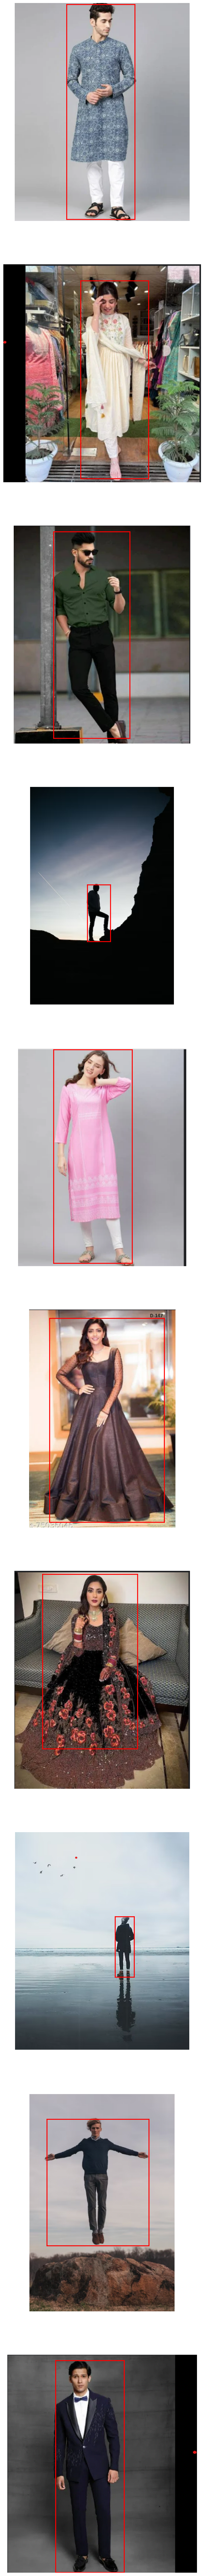

In [56]:

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

model.eval()

fig,axes = plt.subplots(len(images), 1, figsize=(20, 100))
for i in range(len(images)):
    output = model(input_tensor_mrcnn[i].unsqueeze(0))
    masks = output[0]['masks'].detach().cpu().numpy().astype(np.int32)
    boxes = output[0]['boxes'].detach().cpu().numpy()
    mask = masks[0, 0]
    box = boxes[0]
    

    # Draw the bounding box on the image
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].plot([box[0], box[2]], [box[1], box[1]], color='r', linewidth=2)
    axes[i].plot([box[0], box[0]], [box[1], box[3]], color='r', linewidth=2)
    axes[i].plot([box[0], box[2]], [box[3], box[3]], color='r', linewidth=2) 
    axes[i].plot([box[2], box[2]], [box[1], box[3]], color='r', linewidth=2)   
# Show the image
